In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Data ingestion
test = pd.read_csv("test.csv")
submission_tuned = pd.read_csv("submission_tuned.csv")
submission_tuned_sampled = pd.read_csv("submission_tuned_sampled.csv")
accidents = pd.read_csv("accidents.csv")
vehicles = pd.read_csv("vehicles.csv")

In [3]:
test.shape[0] + accidents.shape[0]

267549

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4069f6b610>]],
      dtype=object)

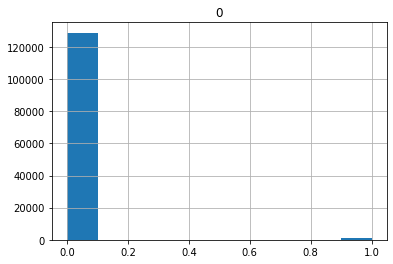

In [4]:
submission_tuned.hist()

In [22]:
# Data cleaning
del accidents['location_easting_osgr']
del accidents['location_northing_osgr']
del accidents['longitude']
del accidents['latitude']
del accidents['date']
del accidents['time'] # Make bins
del accidents['police_force'] #temporal
del accidents['lsoa_of_accident_location']


In [23]:
resultados_no.shape

(23600, 22)

In [9]:
#BALANCEADO RESULTADOS
#num = accid
resultados_no = accidents[accidents.target==1]
num= resultados_no.shape[0]
resultados_acc = accidents[accidents.target==0].sample(n=num, random_state=1)

accidents = pd.concat([resultados_acc, resultados_no])

In [162]:
# accidents = accidents[['accident_id', 'number_of_vehicles', 'number_of_casualties', 'road_type',
#         'speed_limit', 'junction_detail', 'light_conditions','target']]

In [24]:
# DUMMY VARIABLES
n = 'light_conditions'
dum = pd.get_dummies(accidents['light_conditions']).iloc[:,1:]
columns = [""+n+name for name in dum.columns]
dum.columns = columns
accidents = pd.concat([accidents, dum], axis=1)
del accidents['light_conditions']

dummies =  ['1st_road_class', '2nd_road_class', 'road_type', 'junction_detail', 
            'junction_control', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities',
            'special_conditions_at_site', 'local_authority_district', 'local_authority_highway', 
            'urban_or_rural_area', 'road_surface_conditions', 'carriageway_hazards']

cols = accidents.columns
for dumy in dummies:
    if dumy in cols:
        dum = pd.get_dummies(accidents[dumy])
        columns = [""+dumy+str(name) for name in dum.columns]
        dum.columns = columns
        accidents = pd.concat([accidents, dum], axis=1)
        del accidents[dumy]

In [25]:
dummies =  ['Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver'
       , 'Propulsion_Code']

cols = vehicles.columns
for dumy in dummies:
    if dumy in cols:
        dum = pd.get_dummies(vehicles[dumy])
        columns = [""+dumy+str(name) for name in dum.columns]
        dum.columns = columns
        vehicles = pd.concat([vehicles, dum], axis=1)
        del vehicles[dumy]

In [26]:
datos = pd.merge(accidents, vehicles, how='inner', on='accident_id')

In [31]:
datos.columns

Index(['accident_id', 'number_of_vehicles', 'number_of_casualties',
       '1st_road_number', 'speed_limit', '2nd_road_number',
       'weather_conditions', 'target',
       'light_conditionsDarkness - lighting unknown',
       'light_conditionsDarkness - lights lit',
       ...
       'Propulsion_Code-1', 'Propulsion_CodeElectric',
       'Propulsion_CodeElectric diesel', 'Propulsion_CodeGas',
       'Propulsion_CodeGas/Bi-fuel', 'Propulsion_CodeHeavy oil',
       'Propulsion_CodeHybrid electric', 'Propulsion_CodeNew fuel technology',
       'Propulsion_CodePetrol', 'Propulsion_CodePetrol/Gas (LPG)'],
      dtype='object', length=818)

In [28]:
accidents = datos
# Training and test dataset
X = accidents.iloc[:,1:]
del X['target']
Y = accidents.target
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [18]:
# Fit model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve, precision_score

model = XGBClassifier(nthread=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [38]:
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='binary')
precision = precision_score(y_test, predictions)

print(accuracy, recall, precision, f1)


0.6866205496269714 0.5879194630872483 0.27275557861961597 0.37263381779510807


In [213]:
unque_accident_vec = pd.DataFrame(vehicles.accident_id.unique(), columns=['accident_id'])

In [217]:
test.shape

(129950, 29)

In [216]:
pd.merge(test, unque_accident_vec, how='inner', on='accident_id')

,accident_id,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,time,1st_road_class,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,lsoa_of_accident_location,police_force,local_authority_district,local_authority_highway
0,372234,532920.0,196330.0,-0.080107,51.650061,2,3,2017-05-08,03:12,A,...,Darkness - lights lit,1,Dry,None,None,Urban,E01001450,Metropolitan Police,Enfield,Enfield
1,332946,526790.0,181970.0,-0.173845,51.522425,2,1,2017-01-01,01:30,A,...,Darkness - lights lit,1,Wet or damp,None,None,Urban,E01004702,Metropolitan Police,Westminster,Westminster
2,596385,535200.0,181260.0,-0.052969,51.514096,3,1,2017-01-01,00:30,A,...,Darkness - lights lit,1,Dry,None,None,Urban,E01004298,Metropolitan Police,Tower Hamlets,Tower Hamlets
3,493689,534340.0,193560.0,-0.060658,51.624832,2,1,2017-01-01,01:11,A,...,Darkness - lights lit,2,Wet or damp,None,None,Urban,E01001429,Metropolitan Police,Enfield,Enfield
4,420550,533680.0,187820.0,-0.072372,51.573408,1,1,2017-01-01,01:42,A,...,Darkness - lights lit,1,Wet or damp,None,None,Urban,E01001808,Metropolitan Police,Hackney,Hackney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107433,491060,308024.0,602926.0,-3.450645,55.311793,1,1,2017-12-17,11:30,A(M),...,Daylight,4,Frost or ice,None,None,Rural,-1,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway
107434,426373,331826.0,567154.0,-3.067116,54.994285,1,1,2017-12-15,13:00,C,...,Daylight,1,Dry,None,Pedestrian in carriageway - not injured,Urban,-1,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway
107435,382213,321809.0,573939.0,-3.225506,55.053767,2,1,2017-12-18,13:30,A(M),...,Daylight,1,Wet or damp,None,None,Rural,-1,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway
107436,463100,310467.0,604501.0,-3.412672,55.326392,1,1,2017-07-18,18:00,A,...,Daylight,1,Dry,None,None,Rural,-1,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway


In [221]:
accidents.shape

(137599, 670)

In [222]:
pd.merge(accidents, vehicles, how='inner', on='accident_id')

,accident_id,number_of_vehicles,number_of_casualties,1st_road_number,speed_limit,2nd_road_number,weather_conditions,target,light_conditionsDarkness - lighting unknown,light_conditionsDarkness - lights lit,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,359433,2,1,4006,30.0,0.0,1,0,0,0,...,No,Journey as part of work,Male,51.0,-1.0,-1,-1.0,3.0,1.0,3.0
1,359433,2,1,4006,30.0,0.0,1,0,0,0,...,No,Not known,Male,23.0,124.0,Petrol,4.0,4.0,1.0,4.0
2,446617,1,1,207,30.0,0.0,1,0,0,1,...,No,Not known,Female,36.0,1461.0,Heavy oil,1.0,10.0,1.0,10.0
3,342312,1,1,4020,30.0,4020.0,1,0,0,1,...,No,Not known,Male,24.0,1390.0,Petrol,5.0,8.0,1.0,8.0
4,495118,1,1,217,30.0,217.0,1,0,0,0,...,No,Journey as part of work,Male,55.0,6692.0,Heavy oil,7.0,9.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256698,304461,2,2,7020,60.0,49.0,1,0,0,0,...,No,Not known,Female,24.0,1598.0,Petrol,14.0,-1.0,1.0,-1.0
256699,304461,2,2,7020,60.0,49.0,1,0,0,0,...,No,Commuting to/from work,Female,62.0,1598.0,Heavy oil,-1.0,-1.0,2.0,-1.0
256700,323841,1,1,74,70.0,0.0,1,0,0,0,...,No,Journey as part of work,Male,61.0,-1.0,-1,-1.0,3.0,1.0,3.0
256701,518512,1,3,724,40.0,0.0,1,0,0,1,...,No,Not known,Male,17.0,1796.0,Petrol,13.0,6.0,1.0,6.0


In [219]:
accidents.shape

(137599, 670)

In [229]:
vehicles.Driver_Home_Area_Type


0         3.0
1         1.0
2         3.0
3         1.0
4         1.0
         ... 
455647    1.0
455648   -1.0
455649    1.0
455650   -1.0
455651   -1.0
Name: Driver_Home_Area_Type, Length: 455652, dtype: float64

In [224]:
vehicles.columns

Index(['accident_id', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'],
      dtype='object')

In [231]:
dummies =  ['Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver'
       , 'Propulsion_Code']

cols = vehicles.columns
for dumy in dummies:
    if dumy in cols:
        dum = pd.get_dummies(vehicles[dumy])
        columns = [""+dumy+str(name) for name in dum.columns]
        dum.columns = columns
        vehicles = pd.concat([vehicles, dum], axis=1)
        del vehicles[dumy]

In [232]:
vehicles.shape

(455652, 149)